In [70]:
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper, FullyObsWrapper
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder
from discovery.environments.custom_minigrids import TwoRoomEnv
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from stable_baselines3 import PPO
from discovery.utils.feat_extractors import MinigridFeaturesExtractor
from stable_baselines3.common.utils import obs_as_tensor

In [61]:
# For 2 Room fully observable
config = {
    "policy_type": "CnnPolicy",
    "total_timesteps": 5e5,
    "env_name": "Two-Room",
    "feat_dim":8,
}

In [62]:
# load agent
model = PPO.load("/Users/kevinroice/Documents/research/discovery/models/tf5hze1v/model")
# FTA agent
# model = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_o42oe737.zip")
# model = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_bl55hpxd.zip")

ModuleNotFoundError: No module named 'cnn'

In [152]:
def make_env():
    env = TwoRoomEnv(render_mode="rgb_array")
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env

from experiments.FeatAct_minigrid.helpers import pre_process_obs
# This has been defined in helpers
# def pre_process_obs(obs, model):
#     obs = np.transpose(obs, (0,3,1,2)) # bring colour channel to front
#     return obs_as_tensor(obs, model.policy.device)

In [34]:
# env = DummyVecEnv([make_env])
env = DummyVecEnv([make_env])
obs = env.reset()

In [132]:
def get_hallway_obs(env, see_obs=False):
    # # Vector Action Encoding:
    # 0 = left
    # 1 = right
    # 2 = forward

    obs = env.reset() # initial obs
    obs_list = []
    for i in range(5):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([1])
    for i in range(2):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    obs, _, _, _ = env.step([0])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs) 

    obs = env.reset() # initial obs
    action_sequence = [2,2,2,2,2,1,2,2,0,2,2,2,1,2,2,2,0]

    for action in action_sequence:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    for action in [0,2,1,2,1]:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    for action in [0,2,1,2,1]:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)
    
    if see_obs:
        img = env.render()
        plt.imshow(np.concatenate([img], 1)) # shows the full environment
        plt.show()
    
    return obs_list

def get_obs_near_goal(env, see_obs=False):
    # # Vector Action Encoding:
    # 0 = left
    # 1 = right
    # 2 = forward
    obs = env.reset() # initial obs
    obs_list = []

    action_sequence = [2,2,2,2,2,1,2,2,0,2,2,2,1,2,2,2,0]

    for action in action_sequence:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    for action in [0,2,1,2,1]:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    for action in [0,2,1,2,1]:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    if see_obs:
        img = env.render()
        plt.imshow(np.concatenate([img], 1)) # shows the full environment
        plt.savefig("../../plots/domains/2room_nodoor.pdf")
        # plt.show()
    
    return obs_list

def get_random_obs(env, see_obs=False):
    obs = env.reset()  # initial obs
    obs_list = []

    # Randomly select actions to take in each room
    np.random.seed(0)
    for _ in range(5):
        obs, _, _, _ = env.step([np.random.randint(3)])  # Random action (0=left, 1=right, 2=forward)
    obs_list.append(obs)

    for _ in range(5):
        obs, _, _, _ = env.step([np.random.randint(3)])  # Random action (0=left, 1=right, 2=forward)
    obs_list.append(obs)

    for _ in range(5):
        obs, _, _, _ = env.step([np.random.randint(3)])  # Random action (0=left, 1=right, 2=forward)

    obs, _, _, _ = env.step([0])
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)

    for _ in range(5):
        obs, _, _, _ = env.step([np.random.randint(3)])  # Random action (0=left, 1=right, 2=forward)
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)

    for _ in range(5):
        obs, _, _, _ = env.step([np.random.randint(3)])  # Random action (0=left, 1=right, 2=forward)
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([1])
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([0])
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)

    obs, _, _, _ = env.step([1])
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([1])
    obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([0])
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)

    # for _ in range(5):
    #     obs, _, _, _ = env.step([np.random.randint(3)])  # Random action (0=left, 1=right, 2=forward)
    # obs_list.append(obs)

    # for _ in range(5):
    #     obs, _, _, _ = env.step([np.random.randint(3)])  # Random action (0=left, 1=right, 2=forward)
    # obs_list.append(obs)


    # for _ in range(5):
    #     obs, _, _, _ = env.step([np.random.randint(3)])  # Random action (0=left, 1=right, 2=forward)
    # obs_list.append(obs)

    if see_obs:
        img = env.render()
        plt.imshow(np.concatenate([img], 1))  # shows the full environment
        plt.savefig("../../plots/domains/2romm_rand.pdf")
        # plt.show()

    return obs_list

6


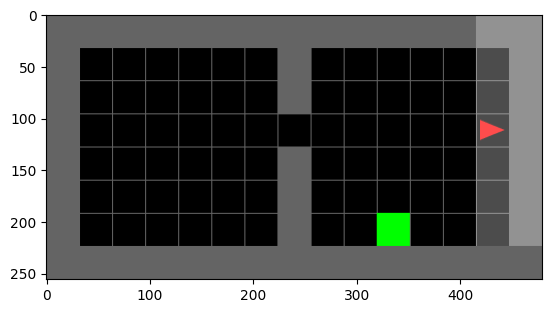

In [131]:
obs = get_random_obs(env, see_obs=True)
# obs = get_hallway_obs(env, see_obs=True)
# obs = get_obs_near_goal(env, see_obs=True)
print(len(obs))

In [75]:
obs_list = get_hallway_obs(env, see_obs=False)
# obs_list = get_obs_near_goal(env, see_obs=False)
max_feat_list = []
feature_activations = []
weighted_feature_activations = []

def calculate_phi_times_max_abs_weights(phi, weights):
    result = torch.zeros(phi.shape)  # Initialize the result tensor
    for j in range(phi.shape[0]):  # Iterate over each neuron j
        max_abs_w = torch.min(torch.abs(weights[j]))  # Find the maximum absolute value of weights for neuron j
        print(max_abs_w)
        result[j] = phi[j] * max_abs_w  # Multiply phi_j by the maximum absolute value
    return result

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model)
        x = model.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))
        weights = model.policy.mlp_extractor.parameters()
        for param in weights:
            if len(param.shape)==2 and param.shape[1] == 8:
                # flatten the 64 by 8 tensor into an 8 d tensor
                reweighted_feat = calculate_phi_times_max_abs_weights(x, param)
                weighted_feature_activations.append(reweighted_feat.reshape(1, -1))


            # print(param[:,4]) # this second index is the feature index we want to see the weights from
    # value_weights = model.policy.value_net.parameters()
    # for param in value_weights:
    #     print(param.shape)
    # p, v = model.policy.mlp_extractor(x)
    # print(p.shape,v.shape)

feature_activations = torch.cat(feature_activations, dim=0)
weighted_feature_activations = torch.cat(weighted_feature_activations, dim=0)
# # only keep the odd entries in one of the lists
# weighted_feature_activations = weighted_feature_activations[::2]

tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)


In [25]:
print(len(weighted_feature_activations))

18


In [26]:
max_feat_list

[5, 5, 5, 2, 2, 2, 5, 5, 5]

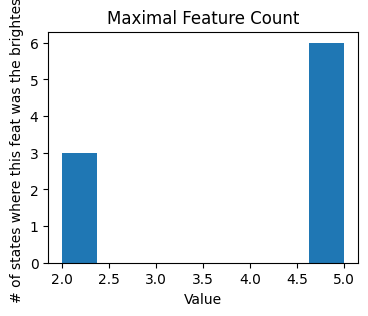

In [27]:
plt.figure(figsize=(4, 3))
plt.hist(max_feat_list, bins=config["feat_dim"])
plt.xlabel('Value')
plt.ylabel('# of states where this feat was the brightest')
plt.title('Maximal Feature Count')
plt.show()

Text(0.5, 1.0, 'Feature Heatmap')

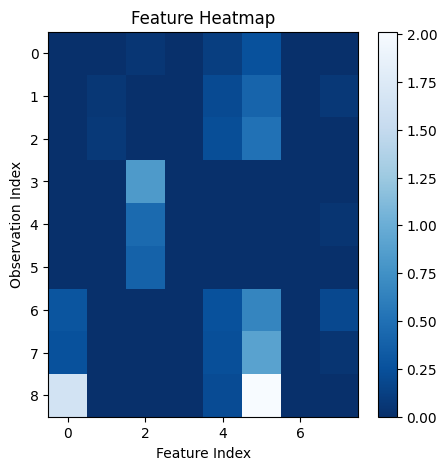

In [28]:
plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
plt.imshow(feature_activations, cmap='Blues_r', aspect='auto')
# y_tick_positions = [i * 56 for i in range(785 // 56)] # 16 by 16
# y_tick_positions = [i * 12 for i in range(36 // 12)]
plt.yticks(range(len(obs_list)))
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Observation Index')
plt.title('Feature Heatmap')
# plt.savefig('../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap.pdf')

Text(0.5, 1.0, 'Weighted Feature Heatmap')

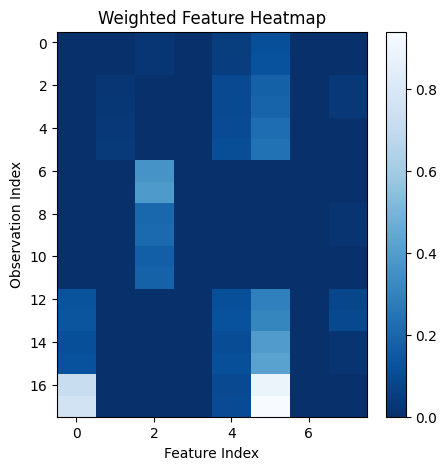

In [37]:

# nromalise each feature vector to be between 0 and 1
# weighted_feature_activations = (weighted_feature_activations - torch.min(weighted_feature_activations, dim=0).values) / (torch.max(weighted_feature_activations, dim=0).values - torch.min(weighted_feature_activations, dim=0).values)
plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
plt.imshow(weighted_feature_activations, cmap='Blues_r', aspect='auto')
# y_tick_positions = [i * 56 for i in range(785 // 56)] # 16 by 16
# y_tick_positions = [i * 12 for i in range(36 // 12)]
# plt.yticks(range(len(obs_list)))
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Observation Index')
plt.title('Weighted Feature Heatmap')
# plt.savefig('../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap.pdf')

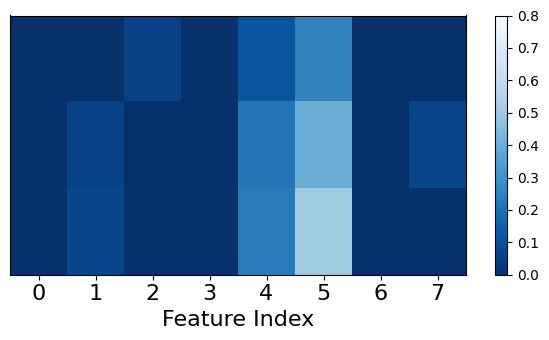

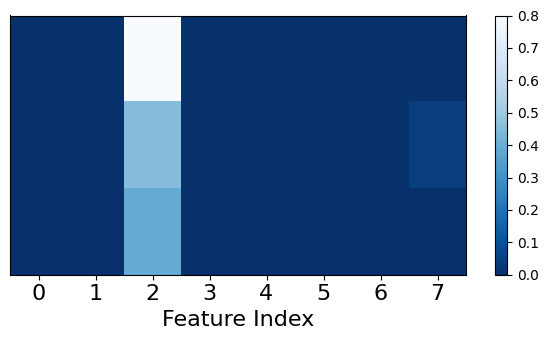

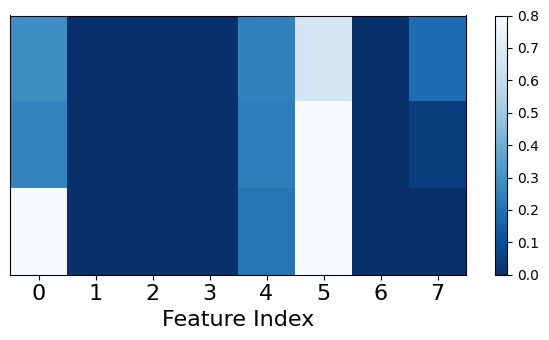

In [79]:
# Assuming feature_activations is a 9xN numpy array
num_rows = 3
num_plots = 3

for i in range(num_plots):
    start_row = i * num_rows
    end_row = start_row + num_rows
    
    plt.figure(figsize=(6, 3.5))  # Adjust the figure size as needed
    plt.imshow(feature_activations[start_row:end_row, :], cmap='Blues_r', aspect='auto')
    plt.colorbar()
    plt.xlabel('Feature Index', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks([])
    plt.clim(0, 0.8)
    plt.tight_layout()  # Ensure tight layout to avoid cropping labels
    plt.show()
    # plt.savefig(f'../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap_{i}.pdf')
    plt.close()

# plt.show()

In [80]:
# FTA
# Assuming feature_activations is a 9xN numpy array
num_rows = 3
num_plots = 3

for i in range(num_plots):
    start_row = i * num_rows
    end_row = start_row + num_rows
    
    plt.figure(figsize=(6, 2))  # Adjust the figure size as needed
    plt.imshow(feature_activations[start_row:end_row, :], cmap='Blues_r', aspect='auto')
    plt.colorbar()
    plt.xlabel('Feature Index', fontsize=16)
    plt.ylabel('Observation Index', fontsize=36)
    plt.xticks(fontsize=16)
    plt.yticks([])
    plt.clim(0, 0.8)
    # plt.tight_layout()  # Ensure tight layout to avoid cropping labels
    # plt.show()
    plt.savefig(f'../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap_fta_{i}.pdf')
    plt.close()

# plt.show()

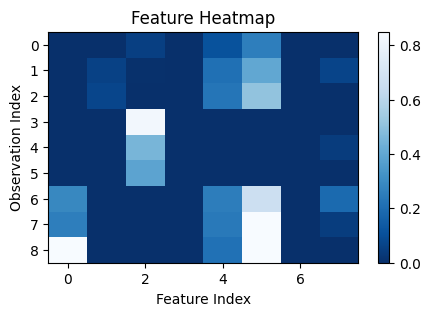

In [13]:
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed
plt.imshow(feature_activations, cmap='Blues_r', aspect='auto')
# y_tick_positions = [i * 56 for i in range(785 // 56)] # 16 by 16
# y_tick_positions = [i * 12 for i in range(36 // 12)]
plt.clim(0,0.85)
plt.yticks(range(len(obs_list)))
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Observation Index')
plt.title('Feature Heatmap')
plt.savefig('../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap.pdf')

In [14]:
# Assuming feature_activations is a 9xN numpy array
num_rows = 3
num_plots = 3

for i in range(num_plots):
    start_row = i * num_rows
    end_row = start_row + num_rows
    
    plt.figure(figsize=(6, 3.5))  # Adjust the figure size as needed
    plt.imshow(feature_activations[start_row:end_row, :], cmap='Blues_r', aspect='auto')
    plt.colorbar()
    plt.xlabel('Feature Index', fontsize=16)
    plt.ylabel('Observation Index', fontsize=34)
    plt.xticks(fontsize=16)
    plt.yticks([])
    plt.clim(0, 0.8)
    plt.tight_layout()
    plt.savefig('../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap_{}.pdf'.format(i))
    plt.close()


plt.show()

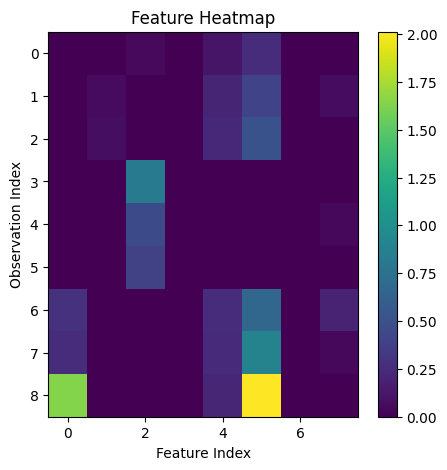

In [15]:
plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
plt.imshow(feature_activations, cmap='viridis', aspect='auto')
# y_tick_positions = [i * 56 for i in range(785 // 56)] # 16 by 16
# y_tick_positions = [i * 12 for i in range(36 // 12)]
plt.yticks(range(len(obs_list)))
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Observation Index')
plt.title('Feature Heatmap')
plt.show()

random states

tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)
tensor(0.0367)
tensor(0.0403)


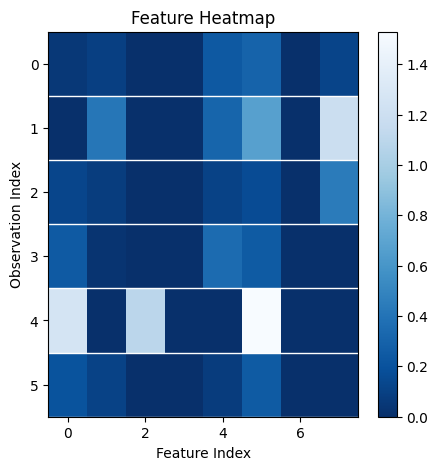

In [134]:
obs_list = get_random_obs(env, see_obs=False)
# obs_list = get_obs_near_goal(env, see_obs=False)
max_feat_list = []
feature_activations = []
weighted_feature_activations = []

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model)
        x = model.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))
        weights = model.policy.mlp_extractor.parameters()
        for param in weights:
            if len(param.shape)==2 and param.shape[1] == 8:
                # flatten the 64 by 8 tensor into an 8 d tensor
                reweighted_feat = calculate_phi_times_max_abs_weights(x, param)
                weighted_feature_activations.append(reweighted_feat.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)
plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
plt.imshow(feature_activations, cmap='Blues_r', aspect='auto')
# y_tick_positions = [i * 56 for i in range(785 // 56)] # 16 by 16
# y_tick_positions = [i * 12 for i in range(36 // 12)]
for i in range(len(feature_activations)):
    plt.axhline(i+0.5, color='white', linewidth=1)
plt.yticks(range(len(obs_list)))
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Observation Index')
plt.title('Feature Heatmap')
plt.show()

# Moving Hallway
We take our agent(`tf5hze1v`) and place it in an environment where the position of the hallway has changed.
* Hallway at (4, 7) (agent `o3jbjpx6`)
* Hallway at (5, 7) (agent `10ojf91l`)
* Hallway at (1, 7) (agent `gbhx588x`)

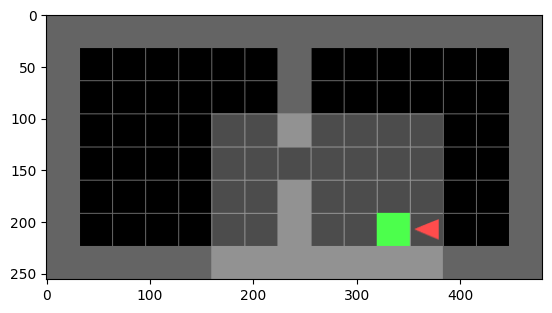

In [16]:
## If this cell doesnt work, restart the kernel and run the first cell, then come back here

# load agent
model_1 = PPO.load("/Users/kevinroice/Documents/research/discovery/models/o3jbjpx6/model")
# make right env
def make_env_one():
    env = TwoRoomEnv(render_mode="rgb_array", hallway_pos=(4,7))
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env

env = DummyVecEnv([make_env_one])

def get_hallway_obs(env, see_obs=False):
    # # Vector Action Encoding:
    # 0 = left
    # 1 = right
    # 2 = forward

    obs = env.reset() # initial obs
    obs_list = []
    for i in range(5):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([1])
    for i in range(3):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    obs, _, _, _ = env.step([0])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs) 

    obs = env.reset() # initial obs
    action_sequence = [2,2,2,2,2,1,2,2,2,0,2,2,2,1,2,2,2,0]

    for action in action_sequence:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    for action in [0,2,1,2,1]:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    for action in [0,2,1,2,1]:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)
    
    if see_obs:
        img = env.render()
        plt.imshow(np.concatenate([img], 1)) # shows the full environment
        plt.show()
    
    return obs_list
obs_list = get_hallway_obs(env, see_obs=True)
max_feat_list = []
feature_activations = []

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model_1)
        x = model_1.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)

# Assuming feature_activations is a 9xN numpy array
num_rows = 3
num_plots = 3

for i in range(num_plots):
    start_row = i * num_rows
    end_row = start_row + num_rows
    
    plt.figure(figsize=(6, 3.5))  # Adjust the figure size as needed
    plt.imshow(feature_activations[start_row:end_row, :], cmap='Blues_r', aspect='auto')
    plt.colorbar()
    plt.xlabel('Feature Index', fontsize=16)
    plt.ylabel('Observation Index', fontsize=34)
    plt.xticks(fontsize=16)
    plt.yticks([])
    plt.clim(0, 0.8)
    plt.tight_layout()  # Ensure tight layout to avoid cropping labels
    plt.savefig(f'../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap_2roompos1_{i}.pdf')
    plt.close()

# plt.show()

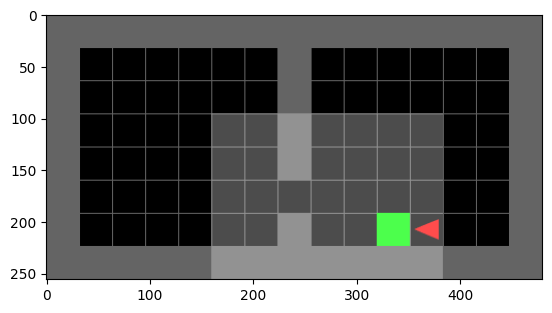

In [72]:
## If this cell doesnt work, restart the kernel and run the first cell, then come back here

# load agent
model_2 = PPO.load("/Users/kevinroice/Documents/research/discovery/models/10ojf91l/model")
# make right env
def make_env_two():
    env = TwoRoomEnv(render_mode="rgb_array", hallway_pos=(5,7))
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env

env = DummyVecEnv([make_env_two])

def get_hallway_obs_two(env, see_obs=False):
    # # Vector Action Encoding:
    # 0 = left
    # 1 = right
    # 2 = forward
    obs = env.reset() # initial obs
    obs_list = []
    for i in range(5):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([1])
    for i in range(4):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    obs, _, _, _ = env.step([0])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)

    obs = env.reset() # initial obs
    action_sequence = [2,2,2,2,2,1,2,2,2,2,0,2,2,2,1,2,2,2,0]

    for action in action_sequence:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    for action in [0,2,1,2,1]:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    for action in [0,2,1,2,1]:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)
    
    if see_obs:
        img = env.render()
        plt.imshow(np.concatenate([img], 1)) # shows the full environment
        plt.show()
    
    return obs_list

obs_list = get_hallway_obs_two(env, see_obs=True)
max_feat_list = []
feature_activations = []

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model_2)
        x = model_2.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)

for i in range(num_plots):
    start_row = i * num_rows
    end_row = start_row + num_rows
    
    plt.figure(figsize=(6, 3.5))  # Adjust the figure size as needed
    plt.imshow(feature_activations[start_row:end_row, :], cmap='Blues_r', aspect='auto')
    plt.colorbar()
    plt.xlabel('Feature Index', fontsize=16)
    plt.ylabel('Observation Index', fontsize=34)
    plt.xticks(fontsize=16)
    plt.yticks([])
    plt.clim(0, 0.8)
    plt.tight_layout()  # Ensure tight layout to avoid cropping labels
    plt.savefig(f'../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap_2roompos2_{i}.pdf')
    plt.close()

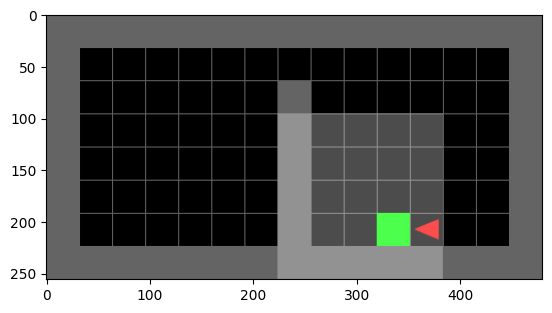

In [22]:
## If this cell doesnt work, restart the kernel and run the first cell, then come back here

# load agent
model_3 = PPO.load("/Users/kevinroice/Documents/research/discovery/models/gbhx588x/model")
# make right env
def make_env_three():
    env = TwoRoomEnv(render_mode="rgb_array", hallway_pos=(1,7))
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env

env = DummyVecEnv([make_env_three])

def get_hallway_obs_three(env, see_obs=False):
    # # Vector Action Encoding:
    # 0 = left
    # 1 = right
    # 2 = forward
    obs = env.reset() # initial obs
    obs_list = []
    for i in range(5):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([1])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    obs, _, _, _ = env.step([0])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    obs = env.reset() # initial obs
    action_sequence = [2,2,2,2,2,2,2,2,1,2,2,2,2,2,0]

    for action in action_sequence:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    for action in [0,2,1,2,1]:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    for action in [0,2,1,2,1]:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)
    
    if see_obs:
        img = env.render()
        plt.imshow(np.concatenate([img], 1)) # shows the full environment
        plt.show()
    
    return obs_list

obs_list = get_hallway_obs_three(env, see_obs=True)
max_feat_list = []
feature_activations = []

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model_2)
        x = model_2.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)

for i in range(num_plots):
    start_row = i * num_rows
    end_row = start_row + num_rows
    
    plt.figure(figsize=(6, 3.5))  # Adjust the figure size as needed
    plt.imshow(feature_activations[start_row:end_row, :], cmap='Blues_r', aspect='auto')
    plt.colorbar()
    plt.xlabel('Feature Index', fontsize=16)
    plt.ylabel('Observation Index', fontsize=34)
    plt.xticks(fontsize=16)
    plt.yticks([])
    plt.clim(0, 0.8)
    plt.tight_layout()  # Ensure tight layout to avoid cropping labels
    # plt.show()
    plt.savefig(f'../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap_2roompos3_{i}.pdf')
    plt.close()

# Random Hallway

In [48]:
# model_4 = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_uigplfa1.zip") # gamma = 0.99
model_4 = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_8v4nu8ku.zip") # gamma = 0.999

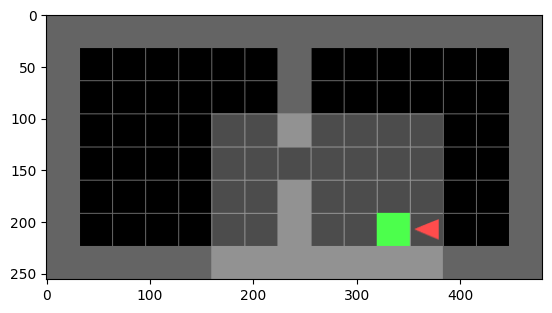

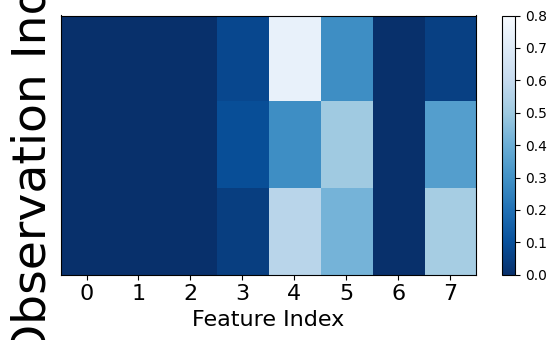

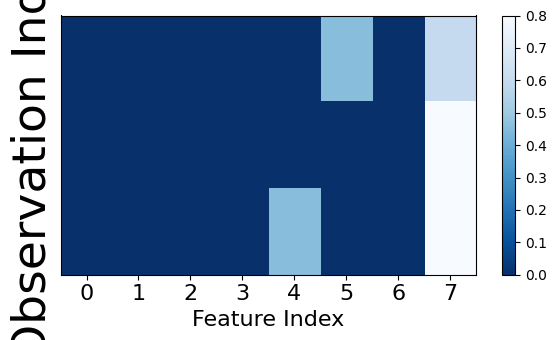

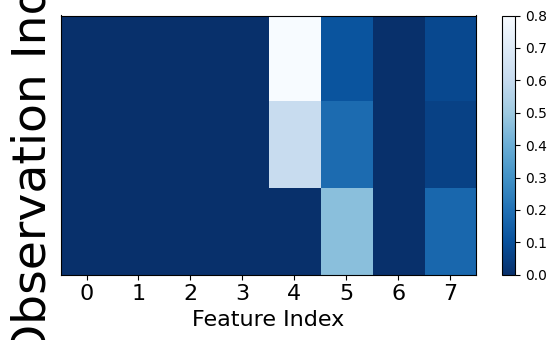

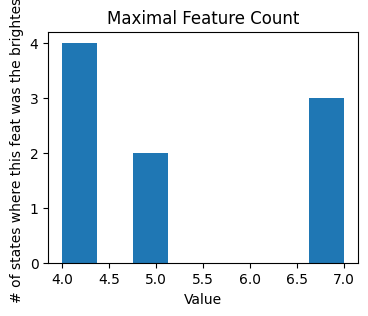

In [54]:
env = DummyVecEnv([make_env_one])

def get_hallway_obs_one(env, see_obs=False):
    # # Vector Action Encoding:
    # 0 = left
    # 1 = right
    # 2 = forward

    obs = env.reset() # initial obs
    obs_list = []
    for i in range(5):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([1])
    for i in range(3):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    obs, _, _, _ = env.step([0])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs) 

    obs = env.reset() # initial obs
    action_sequence = [2,2,2,2,2,1,2,2,2,0,2,2,2,1,2,2,2,0]

    for action in action_sequence:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    for action in [0,2,1,2,1]:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)

    for action in [0,2,1,2,1]:
        obs, _, _, _ = env.step([action])
    obs_list.append(obs)
    
    if see_obs:
        img = env.render()
        plt.imshow(np.concatenate([img], 1)) # shows the full environment
        plt.show()
    
    return obs_list
obs_list = get_hallway_obs_one(env, see_obs=True)
max_feat_list = []
feature_activations = []

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model_1)
        x = model_4.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)

# Assuming feature_activations is a 9xN numpy array
num_rows = 3
num_plots = 3

for i in range(num_plots):
    start_row = i * num_rows
    end_row = start_row + num_rows
    
    plt.figure(figsize=(6, 3.5))  # Adjust the figure size as needed
    plt.imshow(feature_activations[start_row:end_row, :], cmap='Blues_r', aspect='auto')
    plt.colorbar()
    plt.xlabel('Feature Index', fontsize=16)
    plt.ylabel('Observation Index', fontsize=34)
    plt.xticks(fontsize=16)
    plt.yticks([])
    plt.clim(0, 0.8)
    plt.tight_layout()  # Ensure tight layout to avoid cropping labels
    # plt.savefig(f'../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap_2roompos1_{i}.pdf')
    # plt.close()
    plt.show()

plt.figure(figsize=(4, 3))
plt.hist(max_feat_list, bins=config["feat_dim"])
plt.xlabel('Value')
plt.ylabel('# of states where this feat was the brightest')
plt.title('Maximal Feature Count')
plt.show()

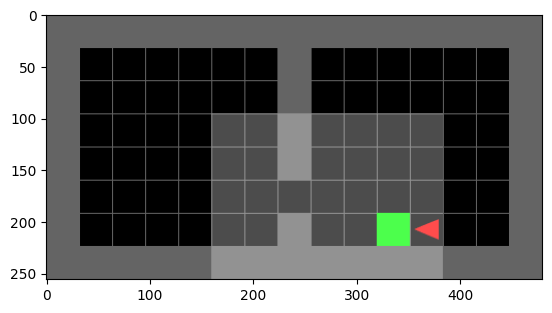

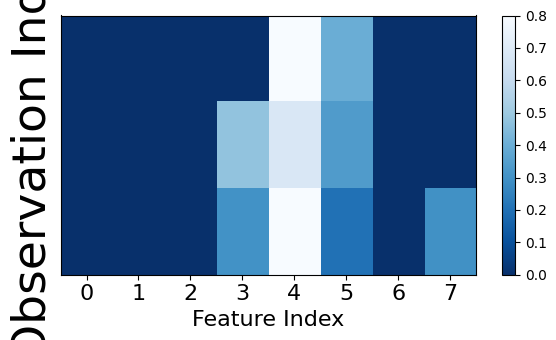

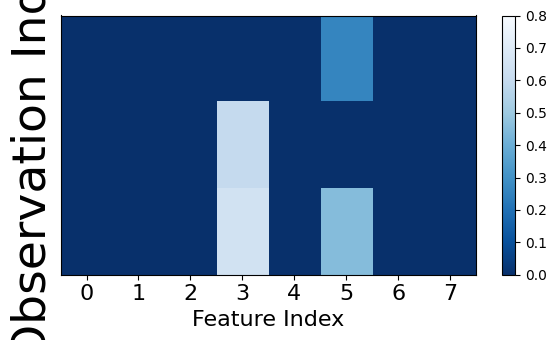

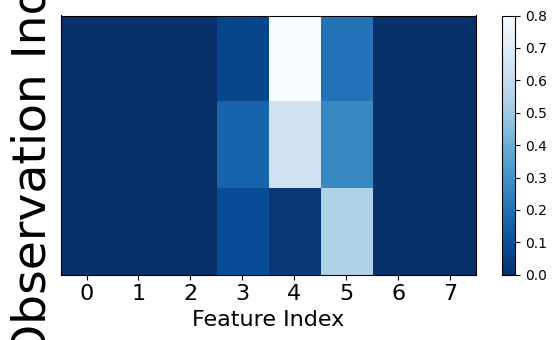

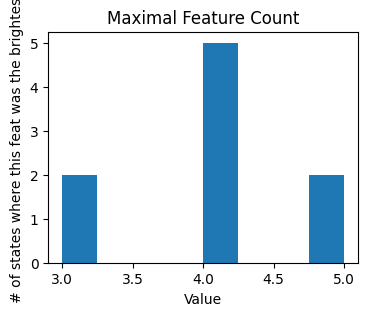

In [51]:
env = DummyVecEnv([make_env_two])

obs_list = get_hallway_obs_two(env, see_obs=True)
max_feat_list = []
feature_activations = []

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model_1)
        x = model_4.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)

# Assuming feature_activations is a 9xN numpy array
num_rows = 3
num_plots = 3

for i in range(num_plots):
    start_row = i * num_rows
    end_row = start_row + num_rows
    
    plt.figure(figsize=(6, 3.5))  # Adjust the figure size as needed
    plt.imshow(feature_activations[start_row:end_row, :], cmap='Blues_r', aspect='auto')
    plt.colorbar()
    plt.xlabel('Feature Index', fontsize=16)
    plt.ylabel('Observation Index', fontsize=34)
    plt.xticks(fontsize=16)
    plt.yticks([])
    plt.clim(0, 0.8)
    plt.tight_layout()  # Ensure tight layout to avoid cropping labels
    # plt.savefig(f'../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap_2roompos1_{i}.pdf')
    # plt.close()
    plt.show()

plt.figure(figsize=(4, 3))
plt.hist(max_feat_list, bins=config["feat_dim"])
plt.xlabel('Value')
plt.ylabel('# of states where this feat was the brightest')
plt.title('Maximal Feature Count')
plt.show()

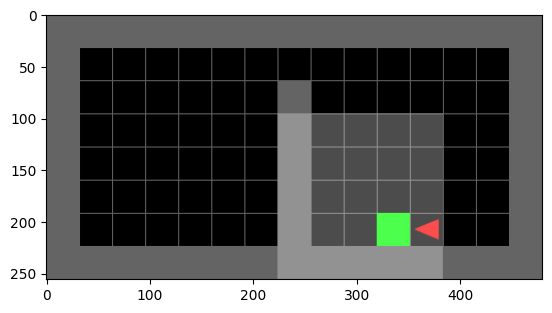

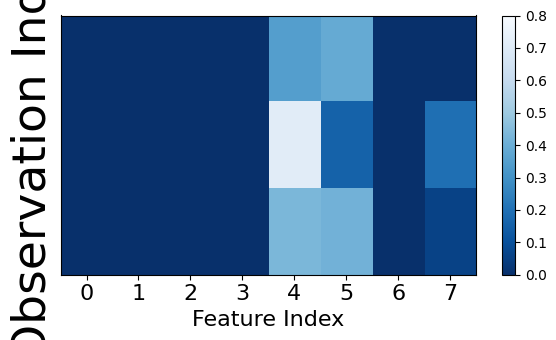

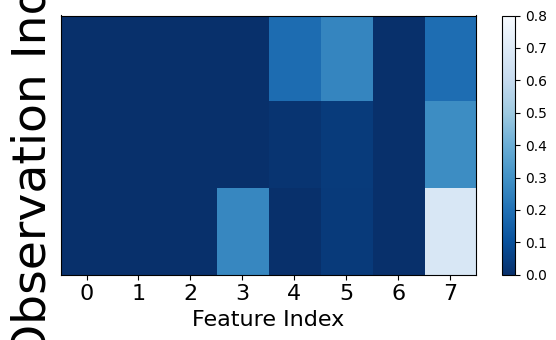

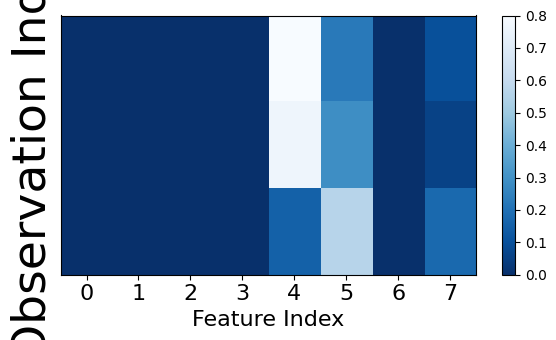

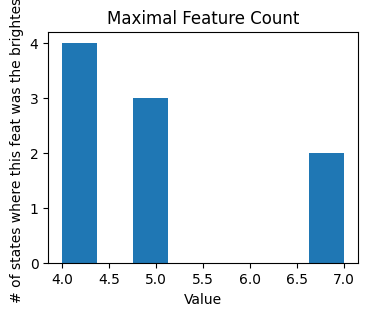

In [52]:
env = DummyVecEnv([make_env_three])

obs_list = get_hallway_obs_three(env, see_obs=True)
max_feat_list = []
feature_activations = []

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model_1)
        x = model_4.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)

# Assuming feature_activations is a 9xN numpy array
num_rows = 3
num_plots = 3

for i in range(num_plots):
    start_row = i * num_rows
    end_row = start_row + num_rows
    
    plt.figure(figsize=(6, 3.5))  # Adjust the figure size as needed
    plt.imshow(feature_activations[start_row:end_row, :], cmap='Blues_r', aspect='auto')
    plt.colorbar()
    plt.xlabel('Feature Index', fontsize=16)
    plt.ylabel('Observation Index', fontsize=34)
    plt.xticks(fontsize=16)
    plt.yticks([])
    plt.clim(0, 0.8)
    plt.tight_layout()  # Ensure tight layout to avoid cropping labels
    # plt.savefig(f'../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap_2roompos1_{i}.pdf')
    # plt.close()
    plt.show()

plt.figure(figsize=(4, 3))
plt.hist(max_feat_list, bins=config["feat_dim"])
plt.xlabel('Value')
plt.ylabel('# of states where this feat was the brightest')
plt.title('Maximal Feature Count')
plt.show()

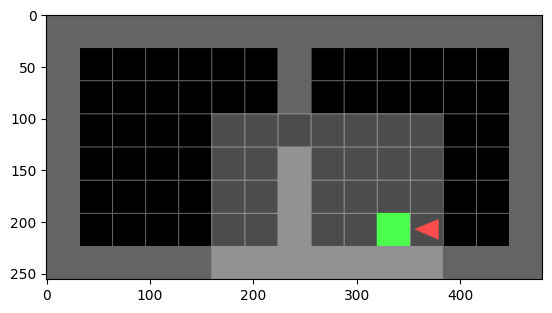

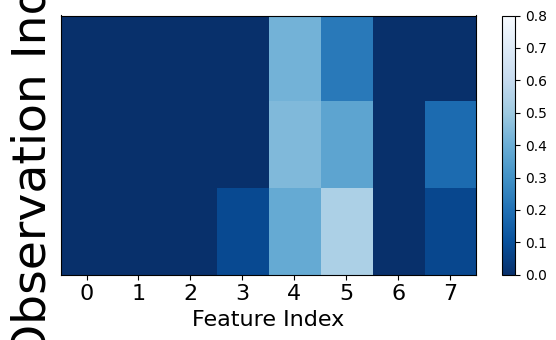

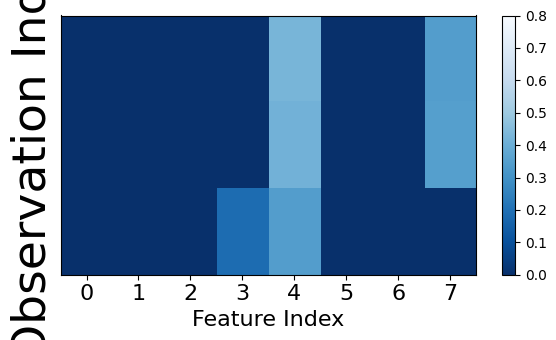

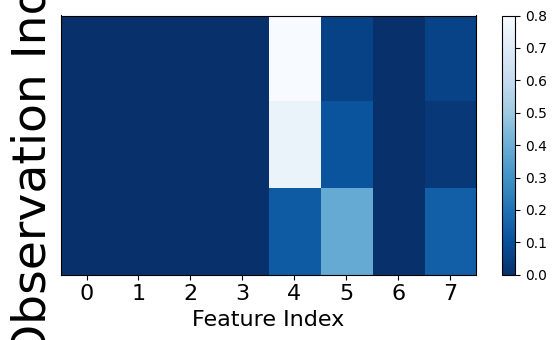

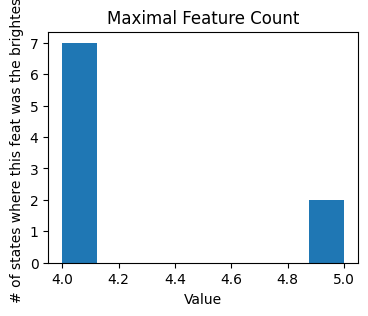

In [57]:
env = DummyVecEnv([make_env])
obs = env.reset()
obs_list = get_hallway_obs(env, see_obs=True)
max_feat_list = []
feature_activations = []

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model_1)
        x = model_4.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)

# Assuming feature_activations is a 9xN numpy array
num_rows = 3
num_plots = 3

for i in range(num_plots):
    start_row = i * num_rows
    end_row = start_row + num_rows
    
    plt.figure(figsize=(6, 3.5))  # Adjust the figure size as needed
    plt.imshow(feature_activations[start_row:end_row, :], cmap='Blues_r', aspect='auto')
    plt.colorbar()
    plt.xlabel('Feature Index', fontsize=16)
    plt.ylabel('Observation Index', fontsize=34)
    plt.xticks(fontsize=16)
    plt.yticks([])
    plt.clim(0, 0.8)
    plt.tight_layout()  # Ensure tight layout to avoid cropping labels
    # plt.savefig(f'../../plots/feature_activations/minigrid_2RoomChain/feature_heatmap_2roompos1_{i}.pdf')
    # plt.close()
    plt.show()

plt.figure(figsize=(4, 3))
plt.hist(max_feat_list, bins=config["feat_dim"])
plt.xlabel('Value')
plt.ylabel('# of states where this feat was the brightest')
plt.title('Maximal Feature Count')
plt.show()

## See all hallway feature activities

In [58]:
model_4 = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_8v4nu8ku.zip")

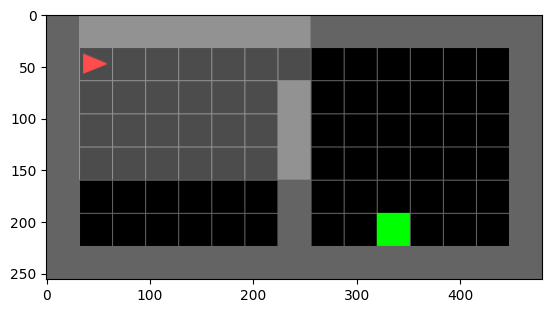

In [61]:
env = DummyVecEnv([make_env_three])
obs = env.reset()
img = env.render()
plt.imshow(np.concatenate([img], 1)) # shows the full environment
plt.show()

In [104]:
def make_env_a():
    env = TwoRoomEnv(render_mode="rgb_array", hallway_pos=(1,7))
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env
def go_to_a(env):
    obs = env.reset() # initial obs
    for i in range(6):
        obs, _, _, _ = env.step([2])
    img = env.render()
    plt.imshow(np.concatenate([img], 1)) # shows the full environment
    plt.show()
    return obs
def make_env_b():
    env = TwoRoomEnv(render_mode="rgb_array", hallway_pos=(2,7))
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env
def go_to_b(env):
    obs = env.reset() # initial obs
    act_seq = [2,2,2,2,2,1,2,0,2]
    for action in act_seq:
        obs, _, _, _ = env.step([action])
    img = env.render()
    plt.imshow(np.concatenate([img], 1)) # shows the full environment
    plt.show()
    return obs
def make_env_c():
    env = TwoRoomEnv(render_mode="rgb_array", hallway_pos=(3,7))
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env
def go_to_c(env):
    obs = env.reset() # initial obs
    act_seq = [2,2,2,2,2,1,2,2,0,2]
    for action in act_seq:
        obs, _, _, _ = env.step([action])
    img = env.render()
    plt.imshow(np.concatenate([img], 1)) # shows the full environment
    plt.show()
    return obs
def make_env_d():
    env = TwoRoomEnv(render_mode="rgb_array", hallway_pos=(4,7))
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env
def go_to_d(env):
    obs = env.reset() # initial obs
    act_seq = [2,2,2,2,2,1,2,2,2,0,2]
    for action in act_seq:
        obs, _, _, _ = env.step([action])
    img = env.render()
    plt.imshow(np.concatenate([img], 1)) # shows the full environment
    plt.show()
    return obs
def make_env_e():
    env = TwoRoomEnv(render_mode="rgb_array", hallway_pos=(5,7))
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env
def go_to_e(env):
    obs = env.reset() # initial obs
    act_seq = [2,2,2,2,2,1,2,2,2,2,0,2]
    for action in act_seq:
        obs, _, _, _ = env.step([action])
    img = env.render()
    plt.imshow(np.concatenate([img], 1)) # shows the full environment
    plt.show()
    return obs
def make_env_f():
    env = TwoRoomEnv(render_mode="rgb_array", hallway_pos=(6,7))
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env
def go_to_f(env):
    obs = env.reset() # initial obs
    act_seq = [2,2,2,2,2,1,2,2,2,2,2,0,2]
    for action in act_seq:
        obs, _, _, _ = env.step([action])
    img = env.render()
    plt.imshow(np.concatenate([img], 1)) # shows the full environment
    plt.show()
    return obs

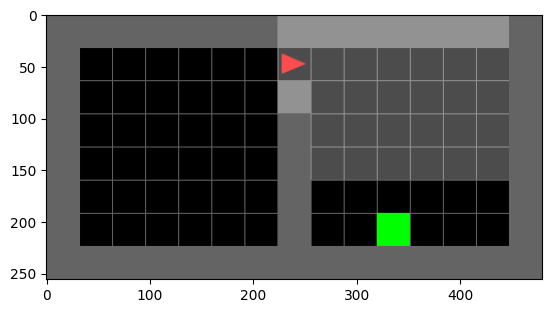

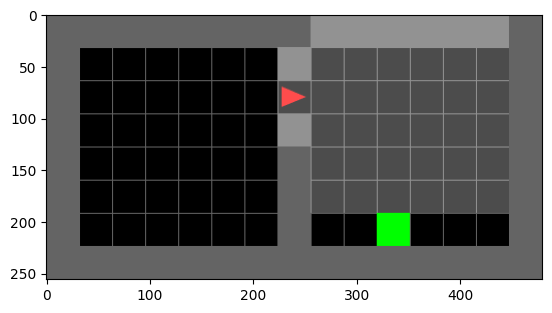

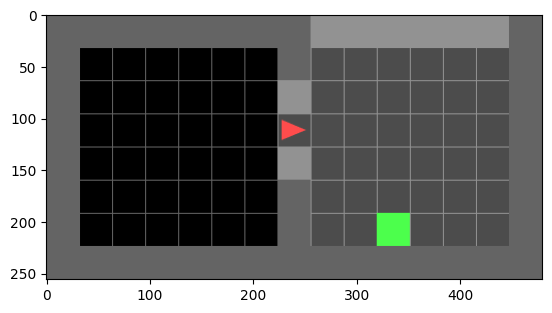

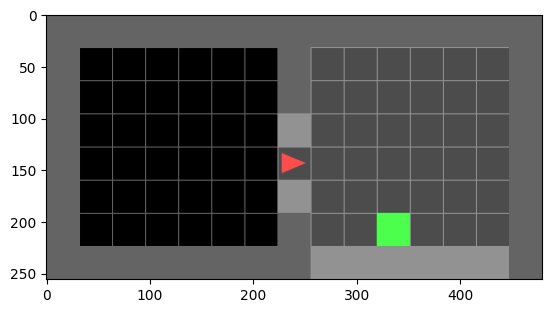

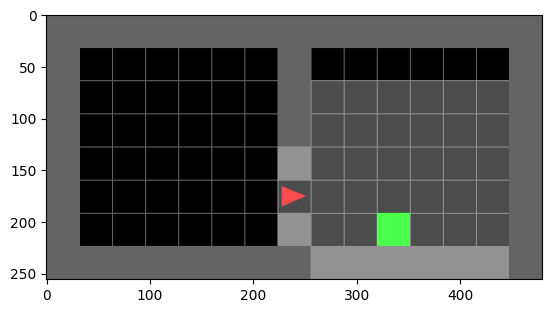

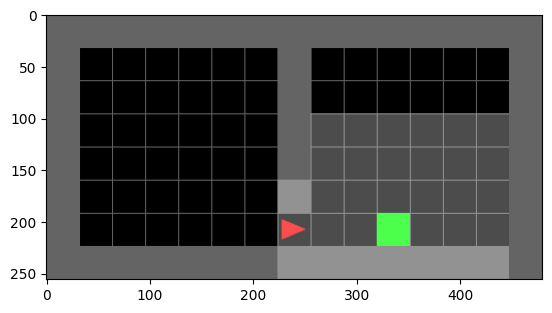

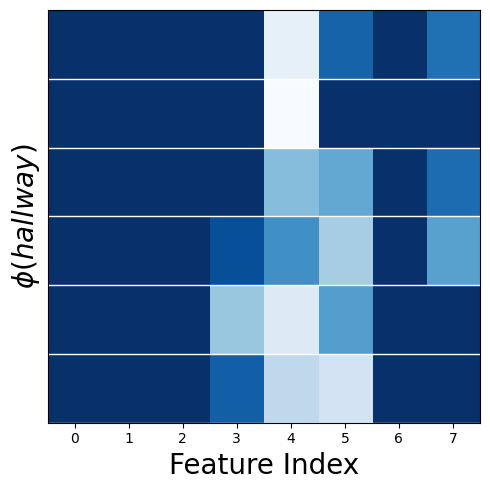

In [125]:
envs = [make_env_a, make_env_b, make_env_c, make_env_d, make_env_e, make_env_f]
obs_funs = [go_to_a, go_to_b, go_to_c, go_to_d, go_to_e, go_to_f]
obs_list = []
feature_activations = []
for make_env, get_obs in zip(envs, obs_funs):
    env = DummyVecEnv([make_env])
    obs = get_obs(env)
    obs_list.append(obs)
with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model_1)
        x = model_4.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)

plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
plt.imshow(feature_activations, cmap='Blues_r', aspect='auto')
for i in range(len(feature_activations)):
    plt.axhline(i+0.5, color='white', linewidth=1)
plt.ylabel(r"$\phi(hallway)$", fontsize=20)
plt.xlabel(r"Feature Index", fontsize=20)
plt.yticks([])
plt.tight_layout()


plt.savefig('../../plots/feature_activations/minigrid_2RoomChain/all_6hallways.pdf')

In [112]:
print(len(feature_activations))

6


# Evaluating with a Classifier

In [45]:
import itertools
from discovery.environments.custom_minigrids import TwoRoomEnv
from discovery.experiments.FeatAct_minigrid.helpers import pre_process_obs
from sklearn.metrics import confusion_matrix

In [90]:
def make_env_at_pos(position, direction, hallway_pos=(3,7)):
    env = TwoRoomEnv(render_mode="rgb_array",
                     agent_start_pos=position,
                     agent_start_dir=direction,
                     hallway_pos=hallway_pos)
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env

In [92]:
def create_dataset(hallway_y=3):
    hallway = (7, hallway_y)
    xs = range(1, 14)
    ys = range(1, 7)
    xys = itertools.product(xs, ys)
    coords_seq = []
    dirs_seq = []
    dirs = range(4)
    all_data = itertools.product(xys, dirs)
    images = []
    obss = []
    labels = []
    for pos_, dir_ in all_data:
        env = make_env_at_pos(position=pos_, direction=dir_, hallway_pos=(hallway[1], hallway[0]))
        try:
            obss.append(env.reset())
            images.append(env.render())
            labels.append(bool(pos_ == hallway))
            coords_seq.append(pos_)
            dirs_seq.append(dir_)
        except AssertionError:
            # print("bad place:", pos_)
            pass
    
    return obss, images, labels, coords_seq, dirs_seq

In [103]:
obss, images, labels, coords, dirs = create_dataset(hallway_y=3)
print("Number of observations: ", len(obss))

Number of observations:  292


In [104]:
obss[0][0].shape

(15, 8, 3)

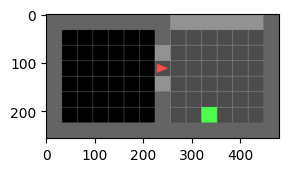

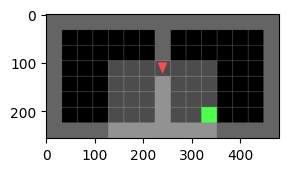

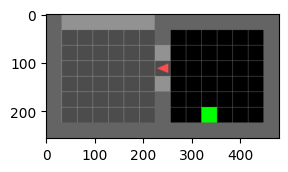

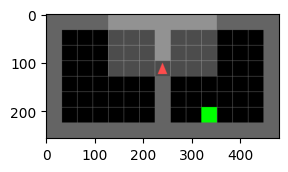

In [105]:
for idx, image in enumerate(images):
    if labels[idx] == 1:
        plt.figure(figsize=(3, 3))
        plt.imshow(image)


In [11]:
# load the model trained on single task setting
# model = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_oesjuzgc.zip")
model = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_pblx7k8h.zip")

In [12]:
def obs_to_feats(model, obss):
    feats = []
    with torch.no_grad():
        for obs in obss:
            obs = pre_process_obs(obs[0], model)
            # print(obs[0].shape)
            if model.__class__.__name__ == "DoubleDQN":
                x = model.policy.extract_features(obs, model.policy.q_net.features_extractor)
            elif model.__class__.__name__ == "PPO":
                x = model.policy.extract_features(obs)
            feats.append(x)  
    return feats
    

In [13]:
feats = obs_to_feats(model, obss)

In [15]:
from discovery.utils import sg_detection 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import copy
import tqdm
import torch.nn as nn
import torch.optim as optim
import importlib

sg_detection = importlib.reload(sg_detection)

def train_classifier(clf, feats, labels,
                     n_epochs=500,
                     batch_size=32,
                     test_size=0.2, random_state=0):
    X = torch.cat(feats, dim=0)
    y = torch.tensor(labels).float()
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=test_size,
                                                        random_state=random_state)
    
    best_acc = - np.inf
    best_weights = None
    batch_start = torch.arange(0, len(X_train), batch_size) # TODO: check if the last batch is included
    loss_fn = nn.BCELoss(reduction='none')  # reduction='none' to get per-sample loss, not mean

    num_pos = y_train.sum()
    num_neg = len(y_train) - num_pos
    base_weight = torch.tensor([1.0, num_neg/num_pos]) # for weighted mean in loss calculation
    
    optimizer = optim.Adam(clf.parameters(), lr=0.0001)
    # TODO: collect positive examples, and concatenate them to each batch

    for epoch in range(n_epochs):
        clf.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=False) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]
                # forward pass
                y_pred = clf(X_batch)
                y_batch = y_batch.unsqueeze(1)
                weight = torch.where(y_batch == 1, base_weight[1], base_weight[0])
                loss2 = loss_fn(y_pred, y_batch)
                final_loss = torch.mean(weight*loss2)
                # backward pass
                optimizer.zero_grad()
                final_loss.backward()
                # update weights
                optimizer.step()
                # print progress
                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(
                    loss=float(final_loss),
                    acc=float(acc)
                )
        # # evaluate accuracy at end of each epoch
        # clf.eval()
        # y_pred = clf(X_test)
        # acc = (y_pred.round() == y_test).float().mean()
        # acc = float(acc)
        if acc > best_acc:
            best_acc = acc
            best_weights = copy.deepcopy(clf.state_dict())
    return best_acc


## Linear - CNN - Single-task

In [16]:
clf = sg_detection.LinearClassifier(input_size=32)
acc = train_classifier(clf, feats, labels)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 250.53batch/s, acc=1, loss=0.647]   


In [111]:
def see_log_reg(clf, feats, labels, coords=coords, dirs=dirs):
    X = torch.cat(feats, dim=0)
    y = torch.tensor(labels).float()
    y_pred = clf(X)

    torch.set_printoptions(linewidth=150, precision=2)
    base = torch.ones((4,7,14))*torch.nan
    for idx, (coord, dir_) in enumerate(zip(coords,dirs)):
        base[dir_, coord[1], coord[0]] = y_pred[idx].item()
    for i in base:
        print(i)

    acc = (y_pred.round() == y).float().mean()
    print("Accuracy: ", acc)
    y_pred_np = y_pred.detach().numpy()
    c_m = confusion_matrix(labels, y_pred_np.round())
    print("Confusion Matrix: ")
    print(c_m)
    return acc, c_m

In [141]:
accuracy, conf_mat = see_log_reg(clf, feats, labels)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.49, 0.50, 0.50, 0.49, 0.49, 0.49,  nan, 0.49, 0.50, 0.49, 0.49, 0.49, 0.49],
        [ nan, 0.51, 0.51, 0.50, 0.49, 0.49, 0.48,  nan, 0.50, 0.50, 0.50, 0.48, 0.48, 0.49],
        [ nan, 0.50, 0.51, 0.51, 0.50, 0.51, 0.51, 0.51, 0.51, 0.50, 0.47, 0.46, 0.48, 0.49],
        [ nan, 0.49, 0.50, 0.50, 0.49, 0.48, 0.48,  nan, 0.50, 0.51, 0.50, 0.49, 0.48, 0.49],
        [ nan, 0.48, 0.49, 0.49, 0.49, 0.49, 0.48,  nan, 0.51, 0.51, 0.49, 0.49, 0.48, 0.49],
        [ nan, 0.48, 0.48, 0.49, 0.49, 0.49, 0.49,  nan, 0.50, 0.49, 0.49, 0.49, 0.48, 0.49]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.50, 0.50, 0.50, 0.50, 0.50, 0.49,  nan, 0.49, 0.50, 0.50, 0.49, 0.49, 0.49],
        [ nan, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50,  nan, 0.50, 0.50, 0.50, 0.49, 0.48, 0.49],
        [ nan, 0.47, 0.51, 0.50, 0.48, 0.48, 0.49, 0.51, 0.

## Non-linear - CNN - Single-task

In [113]:
clf = sg_detection.NonLinearClassifier(input_size=32, hidden_size=64)
acc = train_classifier(clf, feats, labels)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 294.42batch/s, acc=1, loss=0.197]    


In [114]:
accuracy, conf_mat = see_log_reg(clf, feats, labels)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.39, 0.41, 0.38, 0.38, 0.43, 0.34,  nan, 0.27, 0.24, 0.20, 0.21, 0.29, 0.36],
        [ nan, 0.38, 0.40, 0.35, 0.34, 0.37, 0.38,  nan, 0.30, 0.22, 0.26, 0.30, 0.34, 0.35],
        [ nan, 0.38, 0.37, 0.35, 0.34, 0.39, 0.41, 0.49, 0.23, 0.23, 0.28, 0.30, 0.37, 0.35],
        [ nan, 0.35, 0.35, 0.33, 0.34, 0.37, 0.33,  nan, 0.21, 0.21, 0.28, 0.32, 0.36, 0.37],
        [ nan, 0.35, 0.36, 0.35, 0.32, 0.33, 0.39,  nan, 0.25, 0.26, 0.35, 0.41, 0.39, 0.37],
        [ nan, 0.35, 0.37, 0.36, 0.36, 0.32, 0.26,  nan, 0.39, 0.20, 0.34, 0.26, 0.30, 0.36]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.21, 0.08, 0.09, 0.12, 0.27, 0.20,  nan, 0.35, 0.36, 0.47, 0.19, 0.32, 0.37],
        [ nan, 0.41, 0.36, 0.28, 0.25, 0.19, 0.11,  nan, 0.41, 0.12, 0.27, 0.30, 0.36, 0.35],
        [ nan, 0.41, 0.29, 0.18, 0.16, 0.35, 0.50, 0.81, 0.

In [116]:
# test on a diff env variant
obss_5, images_5, labels_5, coords_5, dirs_5 = create_dataset(hallway_y=5)
# for idx, image in enumerate(images_5):
#     if labels[idx] == 1:
#         plt.figure(figsize=(3, 3))
#         plt.imshow(image)
feats_5 = obs_to_feats(model, obss_5)
accuracy, conf_mat = see_log_reg(clf, feats_5, labels_5, coords_5, dirs_5)

tensor([[     nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
        [     nan, 2.18e-36, 2.06e-36, 2.01e-36, 2.03e-36, 2.04e-36, 2.01e-36,      nan, 2.12e-36, 2.05e-36, 2.14e-36, 2.08e-36, 2.15e-36, 2.24e-36],
        [     nan, 2.12e-36, 1.91e-36, 1.92e-36, 1.93e-36, 1.94e-36, 1.93e-36,      nan, 1.97e-36, 1.98e-36, 2.03e-36, 2.02e-36, 2.09e-36, 2.20e-36],
        [     nan, 2.12e-36, 1.99e-36, 1.93e-36, 1.89e-36, 1.90e-36, 1.90e-36,      nan, 1.97e-36, 1.99e-36, 1.97e-36, 1.98e-36, 2.00e-36, 2.17e-36],
        [     nan, 2.06e-36, 1.93e-36, 1.88e-36, 1.91e-36, 1.82e-36, 1.95e-36,      nan, 1.89e-36, 1.88e-36, 2.06e-36, 1.97e-36, 2.00e-36, 2.23e-36],
        [     nan, 2.12e-36, 2.04e-36, 1.99e-36, 1.98e-36, 1.95e-36, 2.05e-36, 1.98e-36, 2.03e-36, 2.01e-36, 2.06e-36, 1.99e-36, 2.04e-36, 2.26e-36],
        [     nan, 2.25e-36, 2.25e-36, 2.22e-36, 2.22e-36, 2.17e-36, 2.22e-36,      nan, 2.19e-36, 2

## Linear - CNN - Multi-task

In [106]:
model_multitask = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_wm1nfc2w.zip")
feats = obs_to_feats(model_multitask, obss)
clf_mt = sg_detection.LinearClassifier(input_size=32)
acc = train_classifier(clf_mt, feats, labels)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 153.53batch/s, acc=1, loss=0.535]    


In [107]:
accuracy, conf_mat = see_log_reg(clf_mt, feats, labels)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.48, 0.47, 0.47, 0.47, 0.47, 0.50,  nan, 0.48, 0.47, 0.47, 0.47, 0.48, 0.48],
        [ nan, 0.48, 0.48, 0.47, 0.47, 0.47, 0.49,  nan, 0.47, 0.47, 0.48, 0.49, 0.49, 0.48],
        [ nan, 0.48, 0.48, 0.48, 0.47, 0.48, 0.47, 0.48, 0.47, 0.47, 0.48, 0.48, 0.49, 0.48],
        [ nan, 0.48, 0.48, 0.48, 0.48, 0.48, 0.49,  nan, 0.47, 0.47, 0.48, 0.48, 0.49, 0.49],
        [ nan, 0.48, 0.48, 0.48, 0.47, 0.48, 0.49,  nan, 0.48, 0.47, 0.47, 0.49, 0.49, 0.48],
        [ nan, 0.48, 0.48, 0.48, 0.48, 0.48, 0.47,  nan, 0.47, 0.44, 0.48, 0.48, 0.48, 0.48]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.48, 0.46, 0.46, 0.46, 0.46, 0.44,  nan, 0.47, 0.47, 0.49, 0.47, 0.48, 0.49],
        [ nan, 0.48, 0.46, 0.46, 0.44, 0.44, 0.44,  nan, 0.47, 0.40, 0.45, 0.48, 0.48, 0.49],
        [ nan, 0.49, 0.46, 0.44, 0.43, 0.50, 0.51, 0.55, 0.

In [108]:
# try the same classifier on a different env variant
obss_5, images_5, labels_5, coords_5, dirs_5 = create_dataset(hallway_y=5)
feats_5 = obs_to_feats(model, obss_5)
accuracy, conf_mat = see_log_reg(clf, feats_5, labels_5)

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, 0., 0., 0., 0., 0., 0., nan, 0., 0., 0., 0., 0., 0.],
        [nan, 0., 0., 0., 0., 0., 0., nan, 0., 0., 0., 0., 0., 0.],
        [nan, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [nan, 0., 0., 0., 0., 0., 0., nan, 0., 0., 0., 0., 0., 0.],
        [nan, 0., 0., 0., 0., 0., 0., nan, 0., 0., 0., 0., 0., 0.],
        [nan, 0., 0., 0., 0., 0., 0., nan, 0., 0., 0., 0., 0., 0.]])
tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, 0., 0., 0., 0., 0., 0., nan, 0., 0., 0., 0., 0., 0.],
        [nan, 0., 0., 0., 0., 0., 0., nan, 0., 0., 0., 0., 0., 0.],
        [nan, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [nan, 0., 0., 0., 0., 0., 0., nan, 0., 0., 0., 0., 0., 0.],
        [nan, 0., 0., 0., 0., 0., 0., nan, 0., 0., 0., 0., 0., 0.],
        [nan, 0., 0., 0., 0., 0., 0., nan, 0., 0., 0., 0., 0., 0.]])
tensor([[nan, nan, nan, 

## Non-linear - CNN - Multi-Task

In [158]:
clf_mt = sg_detection.NonLinearClassifier(input_size=32, hidden_size=64)
acc = train_classifier(clf_mt, feats, labels)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 236.79batch/s, acc=1, loss=0.132]    


In [161]:
accuracy, conf_mat = see_log_reg(clf_mt, feats, labels)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.36, 0.36, 0.36, 0.22, 0.30, 0.13,  nan, 0.29, 0.29, 0.28, 0.21, 0.21, 0.27],
        [ nan, 0.30, 0.38, 0.32, 0.28, 0.30, 0.13,  nan, 0.36, 0.30, 0.14, 0.17, 0.18, 0.24],
        [ nan, 0.31, 0.37, 0.31, 0.23, 0.32, 0.60, 0.61, 0.46, 0.35, 0.09, 0.23, 0.21, 0.18],
        [ nan, 0.34, 0.41, 0.36, 0.23, 0.21, 0.24,  nan, 0.19, 0.11, 0.19, 0.29, 0.27, 0.21],
        [ nan, 0.33, 0.33, 0.32, 0.26, 0.26, 0.35,  nan, 0.12, 0.12, 0.09, 0.29, 0.26, 0.21],
        [ nan, 0.29, 0.28, 0.30, 0.31, 0.25, 0.20,  nan, 0.34, 0.17, 0.27, 0.15, 0.28, 0.27]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.18, 0.13, 0.26, 0.37, 0.34, 0.18,  nan, 0.24, 0.17, 0.20, 0.20, 0.21, 0.27],
        [ nan, 0.17, 0.14, 0.17, 0.18, 0.36, 0.17,  nan, 0.20, 0.12, 0.09, 0.13, 0.24, 0.24],
        [ nan, 0.16, 0.32, 0.21, 0.24, 0.27, 0.48, 0.80, 0.

## Linear - observations - single-task setting

In [147]:
def standardise_obs(obss):
    obss_ = [obs[0] for obs in obss] #unpack numpy array from each tuple
    obs_normalised = [(obs - np.mean(obs))/np.std(obs) for obs in obss_]
    obs_flattened = [obs.flatten() for obs in obs_normalised]
    obs_tensors = [torch.tensor(obs).float().unsqueeze(dim=0) for obs in obs_flattened]
    return obs_tensors

In [148]:
obs_tensors = standardise_obs(obss)
obs_clf = sg_detection.LinearClassifier(input_size=360)
train_classifier(obs_clf, obs_tensors, labels, n_epochs=500)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 333.82batch/s, acc=1, loss=0.268]


tensor(1.)

In [151]:
accuracy, conf_mat = see_log_reg(obs_clf, obs_tensors, labels)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.28, 0.23, 0.23, 0.27, 0.27, 0.15,  nan, 0.20, 0.20, 0.20, 0.21, 0.22, 0.31],
        [ nan, 0.24, 0.20, 0.24, 0.23, 0.23, 0.25,  nan, 0.26, 0.22, 0.27, 0.37, 0.19, 0.28],
        [ nan, 0.23, 0.22, 0.23, 0.23, 0.24, 0.24, 0.71, 0.33, 0.26, 0.23, 0.25, 0.19, 0.21],
        [ nan, 0.31, 0.20, 0.23, 0.24, 0.23, 0.24,  nan, 0.27, 0.24, 0.21, 0.23, 0.28, 0.25],
        [ nan, 0.20, 0.22, 0.22, 0.23, 0.25, 0.24,  nan, 0.31, 0.27, 0.28, 0.30, 0.22, 0.32],
        [ nan, 0.23, 0.26, 0.21, 0.28, 0.23, 0.24,  nan, 0.27, 0.27, 0.36, 0.30, 0.28, 0.25]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.28, 0.24, 0.23, 0.28, 0.28, 0.16,  nan, 0.20, 0.21, 0.20, 0.22, 0.22, 0.31],
        [ nan, 0.25, 0.20, 0.25, 0.24, 0.23, 0.26,  nan, 0.27, 0.22, 0.27, 0.38, 0.20, 0.29],
        [ nan, 0.23, 0.22, 0.23, 0.23, 0.25, 0.24, 0.73, 0.

## Non-linear - observations - single-task

In [152]:
obs_tensors = standardise_obs(obss)
obs_clf = sg_detection.NonLinearClassifier(input_size=360, hidden_size=64)
train_classifier(obs_clf, obs_tensors, labels, n_epochs=500)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 267.50batch/s, acc=1, loss=0.00728]


tensor(1.)

In [153]:
accuracy, conf_mat = see_log_reg(obs_clf, obs_tensors, labels)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.01, 0.01, 0.01, 0.01, 0.01, 0.00,  nan, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
        [ nan, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,  nan, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01],
        [ nan, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.98, 0.01, 0.01, 0.01, 0.01, 0.00, 0.01],
        [ nan, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01,  nan, 0.01, 0.01, 0.00, 0.01, 0.01, 0.01],
        [ nan, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,  nan, 0.01, 0.01, 0.02, 0.01, 0.00, 0.03],
        [ nan, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,  nan, 0.01, 0.01, 0.10, 0.01, 0.01, 0.01]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.01, 0.01, 0.01, 0.01, 0.01, 0.00,  nan, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
        [ nan, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,  nan, 0.01, 0.01, 0.01, 0.04, 0.01, 0.01],
        [ nan, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.

Findings:
* Classifier on feats
    - Linear classifier that we tried was unable to identify the subgoal state
        - Conf matrix: [[202,  86],
                        [  0,   4]]
    - Non linear classifier that we tried was not able to exactly identify the subgoal state
        - Conf matrix: [[269,  19],
                        [  1,   3]]

* Classifier on observations
    - Linear classifier trained 500 epochs is able to identify the subgoal state
        - Conf matrix: [[288,   0],
                        [  0,   4]]
    - Non linear classifier trained 500 epochs is also able to identify the subgoal state, but more confidently!
        - Conf matrix: [[288,   0],
                        [  0,   4]]

* The feature extractor reduces our observation to a lower dimensional space. However it is harder to learn a function (linear or non-linear) that maps these feature vectors to whether or not they are a subgoal. These means the subgoal information was either lost or harder to find.

## Linear - Random Projections
Random projections can be used to make things smaller but still maintain information. We can do a random projection down to dim feats and 

In [87]:
from sklearn import random_projection
rand_projector = random_projection.GaussianRandomProjection(n_components=32)
rand_proj_X_obs = rand_projector.fit_transform(X_obs)
print(rand_proj_X_obs.shape)

(292, 32)


In [90]:
clf_rand_proj = sg_detection.LinearClassifier(input_size=32)
acc = train_classifier(clf_rand_proj, [torch.tensor(t).float().unsqueeze(dim=0) for t in rand_proj_X_obs], labels)
print(acc)

Epoch 0: 100%|██████████| 8/8 [00:00<00:00, 132.17batch/s, acc=1, loss=0.0482]  

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 37.00batch/s, acc=0.778, loss=0.487] 


tensor(1.)


In [93]:
labels_t = torch.tensor(labels).float()
preds_obs_rand_proj = clf_rand_proj(torch.tensor(rand_proj_X_obs).float())

torch.set_printoptions(linewidth=120, precision=2)
base = torch.ones((4,7,14))*torch.nan
for idx, (coord, dir_) in enumerate(zip(coords,dirs)):
    base[dir_, coord[1], coord[0]] = preds_obs_rand_proj[idx].item()
for i in base:
    print(i)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.13, 0.31, 0.21, 0.36, 0.25, 0.34,  nan, 0.20, 0.55, 0.49, 0.19, 0.33, 0.27],
        [ nan, 0.31, 0.77, 0.25, 0.24, 0.45, 0.27,  nan, 0.38, 0.33, 0.38, 0.69, 0.37, 0.20],
        [ nan, 0.54, 0.28, 0.20, 0.36, 0.52, 0.10, 0.65, 0.38, 0.38, 0.39, 0.37, 0.26, 0.33],
        [ nan, 0.44, 0.17, 0.25, 0.30, 0.30, 0.47,  nan, 0.31, 0.34, 0.15, 0.27, 0.63, 0.12],
        [ nan, 0.39, 0.31, 0.48, 0.49, 0.15, 0.47,  nan, 0.45, 0.31, 0.28, 0.30, 0.41, 0.31],
        [ nan, 0.41, 0.33, 0.38, 0.22, 0.23, 0.16,  nan, 0.16, 0.46, 0.29, 0.20, 0.34, 0.34]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.13, 0.31, 0.20, 0.37, 0.26, 0.34,  nan, 0.20, 0.52, 0.49, 0.19, 0.34, 0.28],
        [ nan, 0.33, 0.76, 0.23, 0.23, 0.43, 0.24,  nan, 0.36, 0.32, 0.43, 0.70, 0.37, 0.20],
        [ nan, 0.54, 0.27, 0.21, 0.36, 0.50, 0.10, 0.64, 0.

In [94]:
preds_obs_rand_proj_np = preds_obs_rand_proj.detach().numpy()
sklearn.metrics.confusion_matrix(labels, preds_obs_rand_proj_np.round())

array([[264,  24],
       [  0,   4]])

## Non-Linear - Random Projections

In [101]:
clf_rand_proj = sg_detection.NonLinearClassifier(input_size=32, hidden_size=64)
acc = train_classifier(clf_rand_proj, [torch.tensor(t).float().unsqueeze(dim=0) for t in rand_proj_X_obs], labels)
print(acc)

Epoch 0: 100%|██████████| 8/8 [00:00<00:00, 211.87batch/s, acc=0, loss=1.24]     


Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 112.35batch/s, acc=1, loss=0.0367] 


tensor(1.)


In [106]:
labels_t = torch.tensor(labels).float()
preds_obs_rand_proj = clf_rand_proj(torch.tensor(rand_proj_X_obs).float())

torch.set_printoptions(linewidth=150, precision=2)
base = torch.ones((4,7,14))*torch.nan
for idx, (coord, dir_) in enumerate(zip(coords,dirs)):
    base[dir_, coord[1], coord[0]] = preds_obs_rand_proj[idx].item()
for i in base:
    print(i)

tensor([[     nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
        [     nan, 4.06e-05, 5.18e-03, 7.72e-04, 2.78e-03, 3.27e-04, 2.78e-02,      nan, 4.52e-04, 7.84e-03, 2.36e-03, 5.48e-04, 8.89e-03, 5.10e-05],
        [     nan, 9.54e-04, 4.67e-02, 5.64e-05, 1.14e-02, 4.52e-03, 1.19e-02,      nan, 1.06e-03, 3.05e-03, 7.93e-02, 3.79e-01, 4.89e-05, 5.91e-05],
        [     nan, 2.31e-02, 2.52e-03, 9.66e-03, 1.49e-02, 2.01e-02, 1.68e-03, 9.81e-01, 1.39e-02, 4.98e-03, 7.59e-04, 2.07e-03, 8.28e-05, 8.43e-05],
        [     nan, 3.42e-03, 6.43e-04, 1.65e-03, 5.79e-04, 6.27e-04, 1.92e-03,      nan, 1.04e-02, 5.63e-03, 2.61e-03, 1.03e-02, 6.23e-03, 1.51e-05],
        [     nan, 1.96e-02, 2.93e-03, 7.47e-02, 3.16e-04, 2.88e-06, 2.73e-03,      nan, 8.14e-03, 1.12e-02, 1.59e-03, 1.34e-03, 1.98e-03, 5.45e-04],
        [     nan, 2.20e-03, 9.30e-02, 2.06e-03, 3.13e-03, 2.17e-04, 1.49e-04,      nan, 2.19e-05, 5

In [107]:
preds_obs_rand_proj_np = preds_obs_rand_proj.detach().numpy()
sklearn.metrics.confusion_matrix(labels, preds_obs_rand_proj_np.round())

array([[286,   2],
       [  0,   4]])

linear function of random projection:
- [[264,  24],
    [  0,   4]]

non-linear function of random projection:
- [[286,   2],
    [  0,   4]]

## Linear - FTA - single-task setting

In [41]:
model_fta_singletask, feat_dim = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_7eq68x12.zip"), 640 # 640 feats, effectively 32
feats = obs_to_feats(model_fta_singletask, obss)
clf_st_fta = sg_detection.LinearClassifier(input_size=feat_dim)
acc = train_classifier(clf_st_fta, feats, labels, n_epochs=500)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 221.77batch/s, acc=1, loss=0.0976]   


In [42]:
accuracy, conf_mat = see_log_reg(clf_st_fta, feats, labels)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.03, 0.08, 0.04, 0.04, 0.04, 0.04,  nan, 0.05, 0.05, 0.03, 0.03, 0.02, 0.05],
        [ nan, 0.05, 0.11, 0.11, 0.07, 0.05, 0.04,  nan, 0.21, 0.08, 0.04, 0.05, 0.04, 0.05],
        [ nan, 0.13, 0.28, 0.19, 0.27, 0.26, 0.18, 0.78, 0.39, 0.21, 0.02, 0.06, 0.03, 0.05],
        [ nan, 0.03, 0.02, 0.02, 0.01, 0.02, 0.04,  nan, 0.31, 0.26, 0.05, 0.08, 0.09, 0.09],
        [ nan, 0.05, 0.10, 0.03, 0.01, 0.01, 0.01,  nan, 0.27, 0.50, 0.22, 0.22, 0.07, 0.06],
        [ nan, 0.02, 0.03, 0.03, 0.02, 0.01, 0.01,  nan, 0.08, 0.14, 0.06, 0.10, 0.03, 0.03]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.02, 0.14, 0.14, 0.14, 0.09, 0.08,  nan, 0.06, 0.03, 0.01, 0.01, 0.01, 0.03],
        [ nan, 0.05, 0.05, 0.20, 0.26, 0.14, 0.14,  nan, 0.45, 0.21, 0.04, 0.12, 0.08, 0.11],
        [ nan, 0.13, 0.31, 0.43, 0.30, 0.36, 0.17, 0.95, 0.

## Non Linear on FTA singletask

In [43]:
clf_st_fta = sg_detection.NonLinearClassifier(input_size=feat_dim, hidden_size=64) # TODO make it read input size from the rep automatically
acc = train_classifier(clf_st_fta, feats, labels, n_epochs=500)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 137.46batch/s, acc=1, loss=0.00045] 


In [44]:
accuracy, conf_mat = see_log_reg(clf_st_fta, feats, labels)

tensor([[     nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
        [     nan, 3.30e-05, 5.78e-04, 4.72e-05, 3.42e-05, 3.72e-05, 7.63e-05,      nan, 4.79e-04, 6.40e-04, 4.08e-05, 7.81e-05, 4.91e-05, 5.18e-04],
        [     nan, 2.08e-04, 4.10e-03, 3.58e-03, 2.98e-04, 6.56e-05, 1.34e-04,      nan, 9.68e-03, 2.05e-04, 5.78e-05, 5.68e-05, 4.26e-05, 2.72e-04],
        [     nan, 5.85e-04, 4.97e-03, 2.04e-03, 7.91e-03, 3.97e-03, 6.67e-03, 9.96e-01, 9.87e-02, 4.61e-03, 2.95e-06, 2.58e-05, 3.83e-05, 2.70e-04],
        [     nan, 2.45e-05, 1.33e-05, 1.19e-05, 1.01e-06, 1.71e-05, 1.51e-04,      nan, 3.18e-02, 7.07e-03, 6.17e-05, 4.25e-04, 8.90e-04, 1.64e-03],
        [     nan, 1.54e-04, 2.84e-03, 4.32e-05, 1.04e-05, 2.24e-06, 5.44e-06,      nan, 3.25e-03, 2.03e-02, 1.55e-03, 2.32e-03, 2.80e-04, 1.82e-04],
        [     nan, 3.17e-05, 3.51e-05, 1.31e-05, 4.60e-06, 6.52e-06, 4.70e-06,      nan, 4.61e-05, 5

## Linear - FTA - multi-task

In [80]:
# model_fta_multitask, feat_dim = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_y6fb78pa.zip"), 40 # 40 feats, effectively 2
# model_fta_multitask, feat_dim = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_sjdhx3qr.zip"), 160 # 160 feats, effectively 8
model_fta_multitask, feat_dim = PPO.load("/Users/kevinroice/Documents/research/discovery/experiments/FeatAct_minigrid/models/PPO_TwoRoomEnv_k4m5656a.zip"), 640 # 640 feats, effectively 32
feats = obs_to_feats(model_fta_multitask, obss)
clf_mt_fta = sg_detection.LinearClassifier(input_size=feat_dim)
acc = train_classifier(clf_mt_fta, feats, labels, n_epochs=500)

ModuleNotFoundError: No module named 'utils.cnn'

In [90]:
accuracy, conf_mat = see_log_reg(clf_mt_fta, feats, labels)

tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.02, 0.02, 0.02, 0.02, 0.03, 0.04,  nan, 0.06, 0.07, 0.05, 0.05, 0.09, 0.06],
        [ nan, 0.02, 0.02, 0.01, 0.02, 0.03, 0.07,  nan, 0.35, 0.15, 0.08, 0.07, 0.10, 0.07],
        [ nan, 0.02, 0.01, 0.01, 0.01, 0.02, 0.04, 0.83, 0.44, 0.44, 0.09, 0.06, 0.09, 0.06],
        [ nan, 0.02, 0.02, 0.01, 0.02, 0.02, 0.04,  nan, 0.55, 0.40, 0.07, 0.06, 0.08, 0.08],
        [ nan, 0.02, 0.02, 0.02, 0.02, 0.02, 0.08,  nan, 0.03, 0.04, 0.05, 0.11, 0.11, 0.10],
        [ nan, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01,  nan, 0.01, 0.01, 0.04, 0.17, 0.11, 0.10]])
tensor([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
        [ nan, 0.03, 0.02, 0.02, 0.02, 0.04, 0.05,  nan, 0.11, 0.15, 0.08, 0.08, 0.14, 0.10],
        [ nan, 0.02, 0.01, 0.01, 0.02, 0.04, 0.08,  nan, 0.62, 0.38, 0.27, 0.17, 0.19, 0.15],
        [ nan, 0.02, 0.01, 0.01, 0.01, 0.02, 0.06, 0.93, 0.

## Non-Linear - FTA - multi-task

In [91]:
clf_mt_fta = sg_detection.NonLinearClassifier(input_size=feat_dim, hidden_size=64) # TODO make it read input size from the rep automatically
acc = train_classifier(clf_mt_fta, feats, labels, n_epochs=500)

Epoch 499: 100%|██████████| 8/8 [00:00<00:00, 57.93batch/s, acc=1, loss=0.00072]  


In [93]:
accuracy, conf_mat = see_log_reg(clf_mt_fta, feats, labels)

tensor([[     nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
        [     nan, 3.13e-05, 1.77e-05, 1.45e-05, 3.32e-05, 9.03e-05, 6.73e-05,      nan, 2.86e-04, 4.96e-04, 1.86e-04, 8.52e-05, 7.65e-04, 3.08e-04],
        [     nan, 2.53e-05, 1.30e-05, 1.29e-05, 2.67e-05, 1.76e-04, 7.96e-04,      nan, 4.88e-02, 4.18e-03, 4.64e-04, 5.73e-04, 7.32e-04, 5.25e-04],
        [     nan, 1.73e-05, 1.37e-05, 1.41e-05, 1.95e-05, 2.84e-05, 1.93e-04, 9.96e-01, 3.30e-02, 1.19e-02, 1.95e-04, 3.97e-04, 4.40e-04, 1.89e-04],
        [     nan, 2.19e-05, 1.98e-05, 1.71e-05, 3.19e-05, 3.37e-05, 2.74e-04,      nan, 9.65e-02, 1.19e-02, 8.55e-05, 1.28e-04, 5.24e-04, 6.58e-04],
        [     nan, 2.98e-05, 3.95e-05, 5.50e-05, 4.88e-05, 2.81e-05, 1.78e-03,      nan, 1.56e-05, 6.39e-05, 1.96e-04, 2.05e-03, 2.06e-03, 1.12e-03],
        [     nan, 3.17e-05, 3.21e-05, 3.75e-05, 3.42e-05, 2.80e-05, 2.45e-05,      nan, 4.09e-06, 1

In [ ]:
# load the model
## see feat vec at diff observations

# create a dataset of observations
## create inputs, and outputs

# train a linear classifier using the features from the model as the input

In [ ]:
# classifier from observations - sanity check
# 